In [11]:
try:
    from google.colab import drive
    drive.mount('/content/drive', force_remount=True)
    COLAB = True
    print("Note: using Google CoLab")
    %tensorflow_version 2.x
except:
    print("Note: not using Google CoLab")
    COLAB = False

Mounted at /content/drive
Note: using Google CoLab


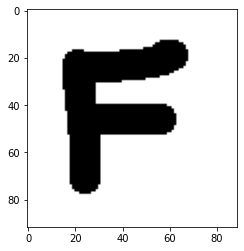

In [12]:
#https://www.youtube.com/watch?v=j-3vuBynnOE

#pip install opencv-pythonimport tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import os
import cv2

DATADIR = "/content/drive/My Drive/Colab Notebooks/QandF/"
CATEGORIES = ["Q", "F"]


for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to QandF folder with Q and F as the categories
    for img in os.listdir(path):
        try:
            img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE) #converting images to grayscale because RGB sized data take a large space, also colours are not really important here to differentiate
            plt.imshow(img_array, cmap="gray") #to view the image
      
        except Exception as e:
            pass


In [13]:
!ls /content/drive/My\ Drive/Colab\ Notebooks

ItoAI_S21_HW4_v4.ipynb	QandF  Untitled0.ipynb	XandO


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import random

DATADIR = "/content/drive/My Drive/Colab Notebooks/QandF/"
CATEGORIES = ["Q", "F"]
#DATADIR = "./kagglecatsanddogs_3367a/PetImages"
#DATADIR = "./kagglecatsanddogs_small/PetImages"
#CATEGORIES = ["Dog", "Cat"]


IMG_SIZE = 50

training_data = []
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to Q and F directory
        class_num = CATEGORIES.index(category) #categorizing the images
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                #plt.imshow(new_array, cmap = 'gray')
                #plt.show()
                training_data.append([new_array,class_num])
            except Exception as e: #broken images
                pass

create_training_data()
print(len(training_data)) #total images, just as many Qs as just as many Fs

random.shuffle(training_data) 

#for sample in training_data:
#    print(sample[1])

X=[]
Y=[]
for features, label in training_data:
    X.append(features)
    Y.append(label)
    
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE,1) #-1 is how many features we have, shape should be imagesize x imagesize, 1 because it is in grayscale
Y = np.array(Y)
X = X/255.0
#print (X)

40


In [15]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X=pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(    
    X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.

model = Sequential()

model.add(Conv2D(14,(3,3),input_shape=X.shape[1:]))
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(14,(3,3)))
#model.add(Conv2D(7,(3,3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(64))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy",
              optimizer="adam",
              metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=10,validation_data=(x_test,y_test),verbose=0)


X.shape= (40, 50, 50, 1)
x_train.shape= (32, 50, 50, 1)
y_train.shape= (32,)
x_test.shape= (8, 50, 50, 1)
y_test.shape= (8,)


***CNN Architecture 1***

**epochs size = 20 used in architecture 1**

In [16]:
#CNN Architecture 1

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X = pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.

model = Sequential() #sequential model

model.add(Conv2D(50,(4,4),input_shape=X.shape[1:])) #4 x 4 is the window size, adding convolutional layer
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
#we can pass acitivation or max pooling
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #pool size is 2 x 2


model.add(Conv2D(50,(4,4))) #4 x 4 is the window size, adding convolutional layer
#model.add(Conv2D(7,(3,3),input_shape=x_train.shape[1:]))
#we can pass acitivation or max pooling
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #pool size is 2 x 2


model.add(Flatten())
model.add(Dense(50))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test),verbose=2)


X.shape= (40, 50, 50, 1)
x_train.shape= (32, 50, 50, 1)
y_train.shape= (32,)
x_test.shape= (8, 50, 50, 1)
y_test.shape= (8,)
Epoch 1/20
1/1 - 1s - loss: 0.7041 - accuracy: 0.5625 - val_loss: 0.6350 - val_accuracy: 0.7500
Epoch 2/20
1/1 - 0s - loss: 0.5914 - accuracy: 0.8125 - val_loss: 0.6038 - val_accuracy: 0.6250
Epoch 3/20
1/1 - 0s - loss: 0.5149 - accuracy: 0.7812 - val_loss: 0.6405 - val_accuracy: 0.5000
Epoch 4/20
1/1 - 0s - loss: 0.5066 - accuracy: 0.6875 - val_loss: 0.4915 - val_accuracy: 0.8750
Epoch 5/20
1/1 - 0s - loss: 0.4107 - accuracy: 0.8438 - val_loss: 0.4959 - val_accuracy: 0.6250
Epoch 6/20
1/1 - 0s - loss: 0.3615 - accuracy: 0.8125 - val_loss: 0.3969 - val_accuracy: 0.8750
Epoch 7/20
1/1 - 0s - loss: 0.2863 - accuracy: 0.9375 - val_loss: 0.5459 - val_accuracy: 0.6250
Epoch 8/20
1/1 - 0s - loss: 0.3340 - accuracy: 0.8750 - val_loss: 0.3096 - val_accuracy: 0.8750
Epoch 9/20
1/1 - 0s - loss: 0.2070 - accuracy: 0.9688 - val_loss: 0.2601 - val_accuracy: 1.0000
Epoch 10/20

***CNN Architecture 2***

**epochs size = 15 used in architecture 2**

In [17]:
#CNN Architecture 2

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import pickle

#X = pickle.load(open("X.pickle", "rb"))
#Y = pickle.load(open("Y.pickle","rb"))
#print(X)

# Split into train/test
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
print("X.shape=",X.shape)
print("x_train.shape=",x_train.shape)
print("y_train.shape=",y_train.shape)
print("x_test.shape=",x_test.shape)
print("y_test.shape=",y_test.shape)

callback = EarlyStopping(monitor='val_loss', patience=5)
# This callback will stop the training when there is no improvement in
# the validation loss for five consecutive epochs.


model = Sequential() #sequential model

model.add(Conv2D(32,(4,4),input_shape=X.shape[1:])) #4 x 4 is the window size, adding convolutional layer #we can pass acitivation or max pooling
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #pool size is 2 x 2
model.add(Conv2D(64,(4,4))) #4 x 4 is the window size, adding convolutional layer
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2,2))) #pool size is 2 x 2
model.add(Conv2D(64,(4,4))) #4 x 4 is the window size, adding convolutional layer
#model.add(Activation("sigmoid"))
model.add(Activation("relu"))

model.add(Flatten())
model.add(Dense(50))

model.add(Dropout(0.2))
model.add(Dense(1))
model.add(Activation('sigmoid'))


model.compile(loss="binary_crossentropy", optimizer="adam", metrics=['accuracy'])
#model.fit(x_train, y_train,batch_size=32,epochs=500,callbacks=[callback],validation_data=(x_test,y_test))
model.fit(x_train, y_train,batch_size=32,epochs=15,validation_data=(x_test,y_test),verbose=2)



X.shape= (40, 50, 50, 1)
x_train.shape= (32, 50, 50, 1)
y_train.shape= (32,)
x_test.shape= (8, 50, 50, 1)
y_test.shape= (8,)
Epoch 1/15
1/1 - 1s - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6685 - val_accuracy: 0.7500
Epoch 2/15
1/1 - 0s - loss: 0.6487 - accuracy: 0.7812 - val_loss: 0.6258 - val_accuracy: 0.6250
Epoch 3/15
1/1 - 0s - loss: 0.5810 - accuracy: 0.8750 - val_loss: 0.5743 - val_accuracy: 0.8750
Epoch 4/15
1/1 - 0s - loss: 0.5051 - accuracy: 0.8750 - val_loss: 0.4968 - val_accuracy: 0.8750
Epoch 5/15
1/1 - 0s - loss: 0.3956 - accuracy: 0.9375 - val_loss: 0.4146 - val_accuracy: 0.8750
Epoch 6/15
1/1 - 0s - loss: 0.2774 - accuracy: 0.9688 - val_loss: 0.3244 - val_accuracy: 0.8750
Epoch 7/15
1/1 - 0s - loss: 0.1944 - accuracy: 0.9688 - val_loss: 0.2612 - val_accuracy: 0.8750
Epoch 8/15
1/1 - 0s - loss: 0.1196 - accuracy: 1.0000 - val_loss: 0.1702 - val_accuracy: 0.8750
Epoch 9/15
1/1 - 0s - loss: 0.0638 - accuracy: 1.0000 - val_loss: 0.2136 - val_accuracy: 0.8750
Epoch 10/15

**Epoch value between 10 to 20 is sufficient to converge the validation accuracy to 70% and higher.**

**Testing the Predictions**

Actual Category:  F
Predicted Category:  F
Model Prediction Percentage:  99.991 %
Correct Classification


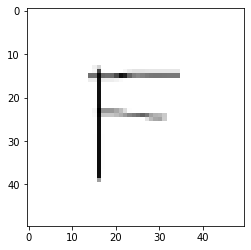

Actual Category:  Q
Predicted Category:  Q
Model Prediction Percentage:  100.0 %
Correct Classification


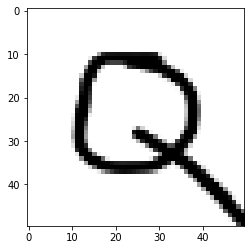

Actual Category:  F
Predicted Category:  F
Model Prediction Percentage:  99.574 %
Correct Classification


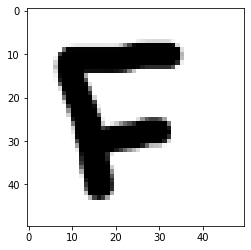

Actual Category:  Q
Predicted Category:  Q
Model Prediction Percentage:  100.0 %
Correct Classification


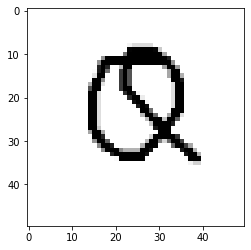

Actual Category:  Q
Predicted Category:  Q
Model Prediction Percentage:  99.975 %
Correct Classification


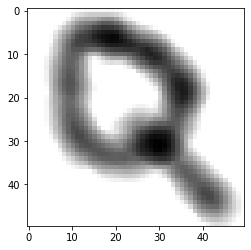

Actual Category:  F
Predicted Category:  F
Model Prediction Percentage:  86.626 %
Correct Classification


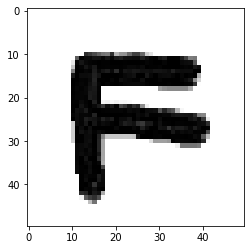

Actual Category:  F
Predicted Category:  Q
Model Prediction Percentage:  9.181 %
Misclassification


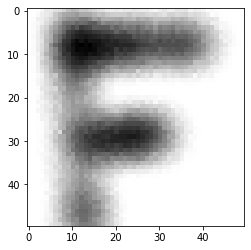

Actual Category:  Q
Predicted Category:  Q
Model Prediction Percentage:  100.0 %
Correct Classification


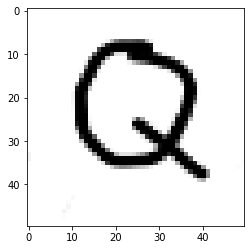

In [20]:
#model prediction
pred = model.predict(x_test)

#print(pred)
length = len(pred)

for i in range(length):
  #Printing the actual category of the image: Q or F
  print("Actual Category: ", CATEGORIES[y_test[i]])

  #Printing the predicted category of the image: Q or F
  print("Predicted Category: ", CATEGORIES[round(pred[i][0])])  
  
  #Prediction Percentages 
  if (y_test[i] == 0):
    print("Model Prediction Percentage: ", (round((1-pred[i][0])*100.0, 3)), "%")
  else:
    print("Model Prediction Percentage: ", (round(pred[i][0]*100.0, 3)), "%")

  if (round(pred[i][0]) == y_test[i]):
    print("Correct Classification")
  else:
    print("Misclassification")  
  
  plt.imshow(x_test[i].reshape(IMG_SIZE, IMG_SIZE), cmap = 'gray')
  plt.show()



**Can you comment on why they could have been misclassified?**
The image size taken in calculations doesn't represent the exact pixels (dimensions) of the image, causing it to zoom in (expand). The reasons for misclassification could be that the letters written are of different sizes and of difference widths, so the model may make errors since the dimensions and positions may be different. Usage of grayscale may result in change in the vibrance of the image too. The images may be blurr and not exactly sharp, creating difficult in getting the correct co-ordinates to form the letter. 